In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [12]:
def toRad(phi):
    return math.radians(phi[0] + (phi[1]+phi[2]/60) / 60)

In [13]:
N = 500
def getLamda(phi):
    return 10**(6) * math.sin(toRad(phi)) / N

In [14]:
phis = [  [162, 10, 58], 
          [161, 50, 58],
          [163, 20, 58],
          [163, 10, 58],
          [165, 50, 58],
          [167, 30, 58],          
          [168, 20, 58]]
phis2 = [  [197, 50, 58], 
          [198, 10, 58],
          [196, 40, 58],
          [196, 50, 58],
          [194, 10, 58],
          [192, 30, 58],          
          [191, 40, 58]]
lamdas = [getLamda(phi) for phi in phis]
print(lamdas)
[round(lamda, 2) for lamda in lamdas]

[611.9629729388834, 623.0300129954668, 573.0676849026241, 578.6390785370563, 488.9413879687222, 432.3301576429632, 403.8843633132101]


[611.96, 623.03, 573.07, 578.64, 488.94, 432.33, 403.88]

In [15]:
def getSigma(phi):
    return abs((10**(6) * math.cos(toRad(phi))* toRad([0, 0, 5]) / N))

In [16]:
dlamdas = [getSigma(phi) for phi in phis]
print(dlamdas)

[0.046156078673213224, 0.04606899500702835, 0.04644855022184888, 0.04640794487578269, 0.04701028251217765, 0.04733511486327113, 0.047482528057854675]


 
0.0005038 x - 0.002842


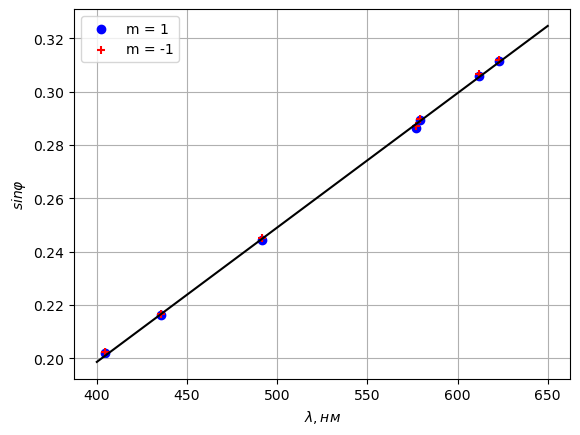

In [115]:
y = [math.sin(toRad(phi)) for phi in phis]
x = [611.9,
623.0,
577.0,
579.1,
491.6,
435.8,
404.7]
y2 = [abs(math.sin(toRad(phi))) for phi in phis2]

fig, ax = plt.subplots()

plt.scatter(x, y, marker='o', color='blue')
plt.scatter(x, y2, marker='+', color='red')
plt.legend(["m = 1","m = -1"])
#plt.errorbar(x2, y2, xerr=[dV for i in range(len(x2))], yerr = [dI for i in range(len(x2))], ecolor='k', linestyle='')

model1 = np.poly1d(np.polyfit(x, y, 1))
print(model1)

polyline = np.linspace(400, 650)
plt.plot(polyline, model1(polyline), color = 'k', label="k = {: .2f}$\pm 0.01$".format(round(model1.c[0], 2)))

k = model1.c[0]
d_exp = 1 / k
dd_exp = [abs(math.cos(toRad(phis[i])) / (math.sin(toRad(phis[i]))**2)) * toRad([0, 0, 5]) * x[i] for i in range(len(phis))]
#dk = -k * ((dI / min(x1))**2 + (dV / min(y1))**2)**0.5

plt.grid()

plt.ylabel('$sin\\varphi$')
plt.xlabel('$\\lambda, нм$')
#plt.show()
plt.savefig('tex/images/plot1.png', bbox_inches='tight')

In [106]:
dks = [abs(math.cos(toRad(phis[i]))) * toRad([0, 0, 5]) / x[i] for i in range(len(x))]
dk = max(dks)
print(d_exp, max(dd_exp))

1984.782360372677 0.235604160149865


In [107]:
def getD(phi):
    return k / math.cos(toRad(phi))
def getdD(phi):
    return ((dk / math.cos(toRad(phi)))**2 + (k * math.sin(toRad(phi)) * toRad([0, 0, 5]) / (math.cos(toRad(phi)))**2)**2)**0.5

In [111]:

y_angles = [
    [235, 30, 58],
    [196, 50, 58],
    [163, 10, 58],
    [124, 40, 58]]

Ds = [abs(getD(y_angle)) * 2 * 10**4 for y_angle in y_angles]
dDs = [abs(getdD(y_angle)) * 2 * 10**4 for y_angle in y_angles]
print([round(ds, 1) for ds in Ds])
print(dDs)

[17.8, 10.5, 10.5, 17.7]
[0.820393107263898, 0.4853204530865178, 0.48523788243560567, 0.8162727774210622]


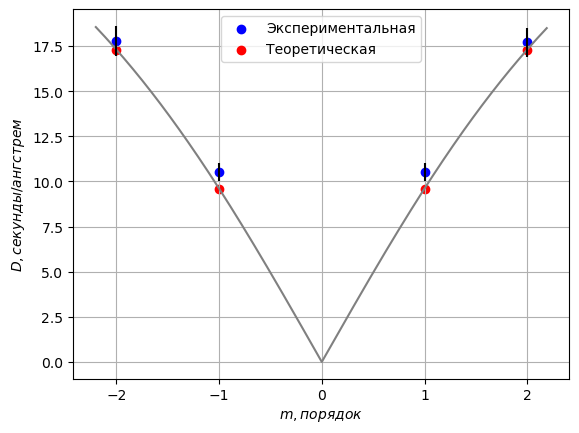

In [114]:
x = [-2, -1, 1, 2]
y = Ds

l = 579.1
l_exp = 590
d_exp_exp = 2100
y2 = [(2 * 10**4) * abs(m) / ((10**(6) / N)**2 + (m * l)**2)**0.5 for m in x]

fig, ax = plt.subplots()

plt.scatter(x, y, marker='o', color='blue')
plt.scatter(x, y2, marker='o', color='red')

X = np.arange(-2.2, 2.2, 0.01)
Y = [(2 * 10**4) * abs(m) / ((10**(6) / N)**2 + (m * l)**2)**0.5 for m in X]
plt.plot(X, Y, color='grey')

plt.errorbar(x, y, yerr = dDs, ecolor='k', linestyle='')

plt.grid()
plt.legend(["Экспериментальная","Теоретическая"], loc = 'upper center')
plt.ylabel('$D, секунды/ангстрем$')
plt.xlabel('$m, порядок$')
#plt.show()
plt.savefig('tex/images/plot2.png', bbox_inches='tight')